# Simple RNN

## Step 1: Load the data

Let's create some data.  In this case, we have a sequence $X = [1,2,3,4,5,4,3,2,1,2,3,4,5,4,3,2,1]$. 

We are to predict the next number of the sequence. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
sequence = [1,2,3,4,5,4,3,2,1,2,3,4,5,4,3,2,1]

print("Length of sequence is", len(sequence))

Length of sequence is 17


## Step 2: Build the model

Inputing data is same as Autoregressive RNN.  The data is created by we use the window of size $T = 3$.  

In [4]:
X = []
y = []
T = 3

for i in range(len(sequence) - T):
    X.append(list(sequence[i:i+T]))
    y.append(sequence[i+T])
    
X = np.array(X)
y = np.array(y)

In [5]:
N = len(X)
print(N, len(y))

14 14


Change the data set in form of $N \times T \times D$.  

In [6]:
X = X.reshape(-1,T,1)
print(X.shape)

(14, 3, 1)


In [7]:
X

array([[[1],
        [2],
        [3]],

       [[2],
        [3],
        [4]],

       [[3],
        [4],
        [5]],

       [[4],
        [5],
        [4]],

       [[5],
        [4],
        [3]],

       [[4],
        [3],
        [2]],

       [[3],
        [2],
        [1]],

       [[2],
        [1],
        [2]],

       [[1],
        [2],
        [3]],

       [[2],
        [3],
        [4]],

       [[3],
        [4],
        [5]],

       [[4],
        [5],
        [4]],

       [[5],
        [4],
        [3]],

       [[4],
        [3],
        [2]]])

In [8]:
y

array([4, 5, 4, 3, 2, 1, 2, 3, 4, 5, 4, 3, 2, 1])

From given data $X = \{x_1, x_2, x_3, \dots, x_{14}\}$, we have 
 

$h_{last}$ = np.zeros(M) This is $1 \times M$ matrix.  

for t in range(T):  
$\hskip 10pt h_t = \sigma(W_{xh}^Tx_t + W_{hh}^Th_{last} + b_h)$  
$\hskip 10pt \hat{y}_t = \sigma(W_0^Th_t + b_0)$  
$\hskip 10pt h_{last} = h_t$

 
 
Let $M = 5$ and $K = 1$. 

$x_t$: an input.   $1 \times D = 1 \times 1$.  
$W_{Xh}$: a matrix from input layer to hidden layer.  $D \times M = 1 \times 5$.  
$W_{hh}$: a matrix from hidden layer to hidden layer.  $M \times M = 5 \times 5$   
$b_h$: constants in hidden layer.  $M \times 1$.  
$W_0$: a matrix from hidden layer to output layer.  $M \times K = 5 \times 1$.  
$b_0$: constant in output layer $K \times 1$.  
$h_t$: $1 \times M$.  
$\hat{y}_t$: $1 \times K$ matrix.  

In [9]:
X[0].shape

(3, 1)

In [13]:
from tensorflow.keras.layers import Input, SimpleRNN, Dense, Flatten, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

In [14]:
T = 3
M = 5
K = 1

In [31]:
i = Input(shape = (T,1))
x = SimpleRNN(M, activation = 'tanh')(i)
#x = LSTM(M)(i)
# this is for LSTM model.  
x = Dense(K)(x)

model = Model(i,x)

## Step 3: Train model

In [32]:
model.compile(loss = 'mse', optimizer = Adam(lr = 0.001))

In [33]:
r = model.fit(X,y, epochs = 3000)

Epoch 1/3000
1/1 [==============================] - 0s 1ms/step - loss: 3.5372
Epoch 2/3000
1/1 [==============================] - 0s 977us/step - loss: 3.5107
Epoch 3/3000
1/1 [==============================] - 0s 2ms/step - loss: 3.4845
Epoch 4/3000
1/1 [==============================] - 0s 998us/step - loss: 3.4586
Epoch 5/3000
1/1 [==============================] - 0s 2ms/step - loss: 3.4330
Epoch 6/3000
1/1 [==============================] - 0s 997us/step - loss: 3.4077
Epoch 7/3000
1/1 [==============================] - 0s 1ms/step - loss: 3.3827
Epoch 8/3000
1/1 [==============================] - 0s 1ms/step - loss: 3.3579
Epoch 9/3000
1/1 [==============================] - 0s 1ms/step - loss: 3.3335
Epoch 10/3000
1/1 [==============================] - 0s 1ms/step - loss: 3.3093
Epoch 11/3000
1/1 [==============================] - 0s 998us/step - loss: 3.2854
Epoch 12/3000
1/1 [==============================] - 0s 2ms/step - loss: 3.2619
Epoch 13/3000
1/1 [======================

1/1 [==============================] - 0s 1ms/step - loss: 1.9326
Epoch 103/3000
1/1 [==============================] - 0s 997us/step - loss: 1.9250
Epoch 104/3000
1/1 [==============================] - 0s 1ms/step - loss: 1.9174
Epoch 105/3000
1/1 [==============================] - 0s 997us/step - loss: 1.9100
Epoch 106/3000
1/1 [==============================] - 0s 1ms/step - loss: 1.9027
Epoch 107/3000
1/1 [==============================] - 0s 2ms/step - loss: 1.8956
Epoch 108/3000
1/1 [==============================] - 0s 2ms/step - loss: 1.8885
Epoch 109/3000
1/1 [==============================] - 0s 999us/step - loss: 1.8815
Epoch 110/3000
1/1 [==============================] - 0s 1ms/step - loss: 1.8746
Epoch 111/3000
1/1 [==============================] - 0s 1ms/step - loss: 1.8678
Epoch 112/3000
1/1 [==============================] - 0s 1ms/step - loss: 1.8612
Epoch 113/3000
1/1 [==============================] - 0s 2ms/step - loss: 1.8546
Epoch 114/3000
1/1 [=================

1/1 [==============================] - 0s 1000us/step - loss: 1.4825
Epoch 203/3000
1/1 [==============================] - 0s 0s/step - loss: 1.4792
Epoch 204/3000
1/1 [==============================] - 0s 996us/step - loss: 1.4758
Epoch 205/3000
1/1 [==============================] - 0s 2ms/step - loss: 1.4725
Epoch 206/3000
1/1 [==============================] - 0s 2ms/step - loss: 1.4692
Epoch 207/3000
1/1 [==============================] - 0s 998us/step - loss: 1.4659
Epoch 208/3000
1/1 [==============================] - ETA: 0s - loss: 1.462 - 0s 999us/step - loss: 1.4626
Epoch 209/3000
1/1 [==============================] - 0s 997us/step - loss: 1.4592
Epoch 210/3000
1/1 [==============================] - 0s 2ms/step - loss: 1.4559
Epoch 211/3000
1/1 [==============================] - 0s 2ms/step - loss: 1.4525
Epoch 212/3000
1/1 [==============================] - 0s 999us/step - loss: 1.4492
Epoch 213/3000
1/1 [==============================] - 0s 1ms/step - loss: 1.4458
Epoch 2

1/1 [==============================] - 0s 2ms/step - loss: 1.1408
Epoch 302/3000
1/1 [==============================] - 0s 999us/step - loss: 1.1374
Epoch 303/3000
1/1 [==============================] - 0s 2ms/step - loss: 1.1341
Epoch 304/3000
1/1 [==============================] - 0s 2ms/step - loss: 1.1307
Epoch 305/3000
1/1 [==============================] - 0s 996us/step - loss: 1.1274
Epoch 306/3000
1/1 [==============================] - 0s 991us/step - loss: 1.1241
Epoch 307/3000
1/1 [==============================] - 0s 2ms/step - loss: 1.1207
Epoch 308/3000
1/1 [==============================] - 0s 2ms/step - loss: 1.1174
Epoch 309/3000
1/1 [==============================] - 0s 997us/step - loss: 1.1141
Epoch 310/3000
1/1 [==============================] - 0s 2ms/step - loss: 1.1108
Epoch 311/3000
1/1 [==============================] - 0s 0s/step - loss: 1.1074
Epoch 312/3000
1/1 [==============================] - 0s 998us/step - loss: 1.1041
Epoch 313/3000
1/1 [==============

1/1 [==============================] - 0s 997us/step - loss: 0.8163
Epoch 402/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.8131
Epoch 403/3000
1/1 [==============================] - 0s 998us/step - loss: 0.8098
Epoch 404/3000
1/1 [==============================] - 0s 996us/step - loss: 0.8066
Epoch 405/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.8034
Epoch 406/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.8002
Epoch 407/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.7970
Epoch 408/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.7938
Epoch 409/3000
1/1 [==============================] - 0s 998us/step - loss: 0.7906
Epoch 410/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.7874
Epoch 411/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.7842
Epoch 412/3000
1/1 [==============================] - 0s 999us/step - loss: 0.7810
Epoch 413/3000
1/1 [=============

1/1 [==============================] - 0s 2ms/step - loss: 0.4861
Epoch 502/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.4831
Epoch 503/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.4801
Epoch 504/3000
1/1 [==============================] - 0s 991us/step - loss: 0.4771
Epoch 505/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.4741
Epoch 506/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.4712
Epoch 507/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.4683
Epoch 508/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.4654
Epoch 509/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.4625
Epoch 510/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.4596
Epoch 511/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.4567
Epoch 512/3000
1/1 [==============================] - 0s 997us/step - loss: 0.4539
Epoch 513/3000
1/1 [===================

1/1 [==============================] - 0s 997us/step - loss: 0.2684
Epoch 602/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.2670
Epoch 603/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.2656
Epoch 604/3000
1/1 [==============================] - 0s 998us/step - loss: 0.2642
Epoch 605/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.2628
Epoch 606/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.2614
Epoch 607/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.2601
Epoch 608/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.2588
Epoch 609/3000
1/1 [==============================] - 0s 0s/step - loss: 0.2574
Epoch 610/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.2561
Epoch 611/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.2548
Epoch 612/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.2535
Epoch 613/3000
1/1 [====================

1/1 [==============================] - 0s 2ms/step - loss: 0.1761
Epoch 702/3000
1/1 [==============================] - 0s 998us/step - loss: 0.1756
Epoch 703/3000
1/1 [==============================] - 0s 996us/step - loss: 0.1750
Epoch 704/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.1745
Epoch 705/3000
1/1 [==============================] - 0s 998us/step - loss: 0.1739
Epoch 706/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.1734
Epoch 707/3000
1/1 [==============================] - 0s 1000us/step - loss: 0.1729
Epoch 708/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.1723
Epoch 709/3000
1/1 [==============================] - 0s 997us/step - loss: 0.1718
Epoch 710/3000
1/1 [==============================] - 0s 997us/step - loss: 0.1713
Epoch 711/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.1708
Epoch 712/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.1703
Epoch 713/3000
1/1 [==========

1/1 [==============================] - 0s 2ms/step - loss: 0.1384
Epoch 802/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.1382
Epoch 803/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.1379
Epoch 804/3000
1/1 [==============================] - 0s 996us/step - loss: 0.1377
Epoch 805/3000
1/1 [==============================] - 0s 996us/step - loss: 0.1374
Epoch 806/3000
1/1 [==============================] - 0s 996us/step - loss: 0.1372
Epoch 807/3000
1/1 [==============================] - 0s 998us/step - loss: 0.1369
Epoch 808/3000
1/1 [==============================] - 0s 999us/step - loss: 0.1366
Epoch 809/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.1364
Epoch 810/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.1361
Epoch 811/3000
1/1 [==============================] - 0s 996us/step - loss: 0.1359
Epoch 812/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.1356
Epoch 813/3000
1/1 [===========

1/1 [==============================] - 0s 999us/step - loss: 0.1164
Epoch 901/3000
1/1 [==============================] - 0s 997us/step - loss: 0.1161
Epoch 902/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.1159
Epoch 903/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.1157
Epoch 904/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.1155
Epoch 905/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.1153
Epoch 906/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.1151
Epoch 907/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.1149
Epoch 908/3000
1/1 [==============================] - 0s 996us/step - loss: 0.1147
Epoch 909/3000
1/1 [==============================] - 0s 998us/step - loss: 0.1145
Epoch 910/3000
1/1 [==============================] - 0s 998us/step - loss: 0.1143
Epoch 911/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.1141
Epoch 912/3000
1/1 [=============

1/1 [==============================] - 0s 999us/step - loss: 0.0958
Epoch 1000/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0956
Epoch 1001/3000
1/1 [==============================] - 0s 997us/step - loss: 0.0953
Epoch 1002/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0951
Epoch 1003/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.0949
Epoch 1004/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.0947
Epoch 1005/3000
1/1 [==============================] - 0s 997us/step - loss: 0.0945
Epoch 1006/3000
1/1 [==============================] - 0s 995us/step - loss: 0.0943
Epoch 1007/3000
1/1 [==============================] - 0s 997us/step - loss: 0.0940
Epoch 1008/3000
1/1 [==============================] - 0s 996us/step - loss: 0.0938
Epoch 1009/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.0936
Epoch 1010/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.0934
Epoch 1011/3000
1/1 

1/1 [==============================] - 0s 991us/step - loss: 0.0736
Epoch 1098/3000
1/1 [==============================] - 0s 996us/step - loss: 0.0734
Epoch 1099/3000
1/1 [==============================] - 0s 0s/step - loss: 0.0732
Epoch 1100/3000
1/1 [==============================] - 0s 997us/step - loss: 0.0730
Epoch 1101/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.0727
Epoch 1102/3000
1/1 [==============================] - 0s 995us/step - loss: 0.0725
Epoch 1103/3000
1/1 [==============================] - 0s 997us/step - loss: 0.0723
Epoch 1104/3000
1/1 [==============================] - 0s 0s/step - loss: 0.0720
Epoch 1105/3000
1/1 [==============================] - 0s 998us/step - loss: 0.0718
Epoch 1106/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.0716
Epoch 1107/3000
1/1 [==============================] - 0s 998us/step - loss: 0.0713
Epoch 1108/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0711
Epoch 1109/3000
1/1 

1/1 [==============================] - 0s 997us/step - loss: 0.0517
Epoch 1197/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.0515
Epoch 1198/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0513
Epoch 1199/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.0511
Epoch 1200/3000
1/1 [==============================] - 0s 999us/step - loss: 0.0509
Epoch 1201/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0507
Epoch 1202/3000
1/1 [==============================] - 0s 998us/step - loss: 0.0505
Epoch 1203/3000
1/1 [==============================] - 0s 997us/step - loss: 0.0503
Epoch 1204/3000
1/1 [==============================] - 0s 0s/step - loss: 0.0501
Epoch 1205/3000
1/1 [==============================] - 0s 998us/step - loss: 0.0499
Epoch 1206/3000
1/1 [==============================] - 0s 997us/step - loss: 0.0497
Epoch 1207/3000
1/1 [==============================] - 0s 998us/step - loss: 0.0495
Epoch 1208/3000
1/1

1/1 [==============================] - 0s 997us/step - loss: 0.0336
Epoch 1295/3000
1/1 [==============================] - 0s 997us/step - loss: 0.0335
Epoch 1296/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.0333
Epoch 1297/3000
1/1 [==============================] - 0s 998us/step - loss: 0.0332
Epoch 1298/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.0330
Epoch 1299/3000
1/1 [==============================] - 0s 998us/step - loss: 0.0328
Epoch 1300/3000
1/1 [==============================] - 0s 996us/step - loss: 0.0327
Epoch 1301/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.0325
Epoch 1302/3000
1/1 [==============================] - 0s 998us/step - loss: 0.0324
Epoch 1303/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0322
Epoch 1304/3000
1/1 [==============================] - 0s 998us/step - loss: 0.0320
Epoch 1305/3000
1/1 [==============================] - 0s 999us/step - loss: 0.0319
Epoch 1306/3000


1/1 [==============================] - 0s 2ms/step - loss: 0.0201
Epoch 1394/3000
1/1 [==============================] - 0s 996us/step - loss: 0.0200
Epoch 1395/3000
1/1 [==============================] - 0s 997us/step - loss: 0.0199
Epoch 1396/3000
1/1 [==============================] - 0s 995us/step - loss: 0.0198
Epoch 1397/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.0196
Epoch 1398/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0195
Epoch 1399/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0194
Epoch 1400/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.0193
Epoch 1401/3000
1/1 [==============================] - 0s 998us/step - loss: 0.0192
Epoch 1402/3000
1/1 [==============================] - 0s 998us/step - loss: 0.0191
Epoch 1403/3000
1/1 [==============================] - 0s 997us/step - loss: 0.0190
Epoch 1404/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.0189
Epoch 1405/3000
1/1 

1/1 [==============================] - 0s 997us/step - loss: 0.0112
Epoch 1493/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.0111
Epoch 1494/3000
1/1 [==============================] - 0s 997us/step - loss: 0.0111
Epoch 1495/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.0110
Epoch 1496/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.0109
Epoch 1497/3000
1/1 [==============================] - 0s 997us/step - loss: 0.0108
Epoch 1498/3000
1/1 [==============================] - 0s 998us/step - loss: 0.0108
Epoch 1499/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.0107
Epoch 1500/3000
1/1 [==============================] - 0s 997us/step - loss: 0.0106
Epoch 1501/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.0106
Epoch 1502/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.0105
Epoch 1503/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.0104
Epoch 1504/3000
1/1 [=

1/1 [==============================] - 0s 998us/step - loss: 0.0060
Epoch 1591/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.0059
Epoch 1592/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.0059
Epoch 1593/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.0059
Epoch 1594/3000
1/1 [==============================] - 0s 998us/step - loss: 0.0058
Epoch 1595/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.0058
Epoch 1596/3000
1/1 [==============================] - 0s 0s/step - loss: 0.0058
Epoch 1597/3000
1/1 [==============================] - 0s 997us/step - loss: 0.0057
Epoch 1598/3000
1/1 [==============================] - 0s 998us/step - loss: 0.0057
Epoch 1599/3000
1/1 [==============================] - 0s 999us/step - loss: 0.0056
Epoch 1600/3000
1/1 [==============================] - 0s 995us/step - loss: 0.0056
Epoch 1601/3000
1/1 [==============================] - 0s 998us/step - loss: 0.0056
Epoch 1602/3000
1/1

1/1 [==============================] - 0s 998us/step - loss: 0.0031
Epoch 1689/3000
1/1 [==============================] - 0s 997us/step - loss: 0.0031
Epoch 1690/3000
1/1 [==============================] - 0s 997us/step - loss: 0.0031
Epoch 1691/3000
1/1 [==============================] - 0s 998us/step - loss: 0.0031
Epoch 1692/3000
1/1 [==============================] - 0s 997us/step - loss: 0.0031
Epoch 1693/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.0030
Epoch 1694/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.0030
Epoch 1695/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.0030
Epoch 1696/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0030
Epoch 1697/3000
1/1 [==============================] - 0s 997us/step - loss: 0.0030
Epoch 1698/3000
1/1 [==============================] - 0s 0s/step - loss: 0.0029
Epoch 1699/3000
1/1 [==============================] - 0s 996us/step - loss: 0.0029
Epoch 1700/3000
1/1

1/1 [==============================] - 0s 996us/step - loss: 0.0017
Epoch 1787/3000
1/1 [==============================] - 0s 998us/step - loss: 0.0017
Epoch 1788/3000
1/1 [==============================] - 0s 998us/step - loss: 0.0016
Epoch 1789/3000
1/1 [==============================] - 0s 998us/step - loss: 0.0016
Epoch 1790/3000
1/1 [==============================] - 0s 998us/step - loss: 0.0016
Epoch 1791/3000
1/1 [==============================] - 0s 996us/step - loss: 0.0016
Epoch 1792/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 1793/3000
1/1 [==============================] - 0s 998us/step - loss: 0.0016
Epoch 1794/3000
1/1 [==============================] - 0s 998us/step - loss: 0.0016
Epoch 1795/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 1796/3000
1/1 [==============================] - 0s 996us/step - loss: 0.0016
Epoch 1797/3000
1/1 [==============================] - 0s 997us/step - loss: 0.0016
Epoch 1798/3

Epoch 1884/3000
1/1 [==============================] - 0s 2ms/step - loss: 9.2528e-04
Epoch 1885/3000
1/1 [==============================] - 0s 2ms/step - loss: 9.2001e-04
Epoch 1886/3000
1/1 [==============================] - 0s 996us/step - loss: 9.1477e-04
Epoch 1887/3000
1/1 [==============================] - 0s 997us/step - loss: 9.0957e-04
Epoch 1888/3000
1/1 [==============================] - 0s 997us/step - loss: 9.0440e-04
Epoch 1889/3000
1/1 [==============================] - 0s 2ms/step - loss: 8.9928e-04
Epoch 1890/3000
1/1 [==============================] - 0s 992us/step - loss: 8.9419e-04
Epoch 1891/3000
1/1 [==============================] - 0s 996us/step - loss: 8.8914e-04
Epoch 1892/3000
1/1 [==============================] - 0s 993us/step - loss: 8.8411e-04
Epoch 1893/3000
1/1 [==============================] - 0s 998us/step - loss: 8.7913e-04
Epoch 1894/3000
1/1 [==============================] - 0s 998us/step - loss: 8.7418e-04
Epoch 1895/3000
1/1 [=================

1/1 [==============================] - 0s 998us/step - loss: 5.5810e-04
Epoch 1979/3000
1/1 [==============================] - 0s 996us/step - loss: 5.5530e-04
Epoch 1980/3000
1/1 [==============================] - 0s 999us/step - loss: 5.5252e-04
Epoch 1981/3000
1/1 [==============================] - 0s 996us/step - loss: 5.4974e-04
Epoch 1982/3000
1/1 [==============================] - 0s 2ms/step - loss: 5.4699e-04
Epoch 1983/3000
1/1 [==============================] - 0s 998us/step - loss: 5.4426e-04
Epoch 1984/3000
1/1 [==============================] - 0s 997us/step - loss: 5.4155e-04
Epoch 1985/3000
1/1 [==============================] - 0s 996us/step - loss: 5.3886e-04
Epoch 1986/3000
1/1 [==============================] - 0s 997us/step - loss: 5.3618e-04
Epoch 1987/3000
1/1 [==============================] - 0s 997us/step - loss: 5.3351e-04
Epoch 1988/3000
1/1 [==============================] - 0s 997us/step - loss: 5.3087e-04
Epoch 1989/3000
1/1 [=============================

Epoch 2072/3000
1/1 [==============================] - 0s 997us/step - loss: 3.5802e-04
Epoch 2073/3000
1/1 [==============================] - 0s 997us/step - loss: 3.5644e-04
Epoch 2074/3000
1/1 [==============================] - 0s 997us/step - loss: 3.5486e-04
Epoch 2075/3000
1/1 [==============================] - 0s 997us/step - loss: 3.5330e-04
Epoch 2076/3000
1/1 [==============================] - 0s 996us/step - loss: 3.5174e-04
Epoch 2077/3000
1/1 [==============================] - 0s 1ms/step - loss: 3.5020e-04
Epoch 2078/3000
1/1 [==============================] - 0s 1ms/step - loss: 3.4866e-04
Epoch 2079/3000
1/1 [==============================] - 0s 2ms/step - loss: 3.4712e-04
Epoch 2080/3000
1/1 [==============================] - 0s 998us/step - loss: 3.4561e-04
Epoch 2081/3000
1/1 [==============================] - 0s 2ms/step - loss: 3.4410e-04
Epoch 2082/3000
1/1 [==============================] - 0s 2ms/step - loss: 3.4259e-04
Epoch 2083/3000
1/1 [=====================

1/1 [==============================] - 0s 0s/step - loss: 2.4109e-04
Epoch 2167/3000
1/1 [==============================] - 0s 998us/step - loss: 2.4012e-04
Epoch 2168/3000
1/1 [==============================] - 0s 1ms/step - loss: 2.3916e-04
Epoch 2169/3000
1/1 [==============================] - 0s 998us/step - loss: 2.3821e-04
Epoch 2170/3000
1/1 [==============================] - 0s 2ms/step - loss: 2.3725e-04
Epoch 2171/3000
1/1 [==============================] - 0s 998us/step - loss: 2.3631e-04
Epoch 2172/3000
1/1 [==============================] - 0s 2ms/step - loss: 2.3536e-04
Epoch 2173/3000
1/1 [==============================] - 0s 997us/step - loss: 2.3442e-04
Epoch 2174/3000
1/1 [==============================] - 0s 996us/step - loss: 2.3349e-04
Epoch 2175/3000
1/1 [==============================] - 0s 1ms/step - loss: 2.3256e-04
Epoch 2176/3000
1/1 [==============================] - 0s 998us/step - loss: 2.3163e-04
Epoch 2177/3000
1/1 [==============================] - 0s 2

1/1 [==============================] - 0s 997us/step - loss: 1.6721e-04
Epoch 2261/3000
1/1 [==============================] - 0s 2ms/step - loss: 1.6658e-04
Epoch 2262/3000
1/1 [==============================] - 0s 1ms/step - loss: 1.6594e-04
Epoch 2263/3000
1/1 [==============================] - 0s 998us/step - loss: 1.6531e-04
Epoch 2264/3000
1/1 [==============================] - 0s 2ms/step - loss: 1.6469e-04
Epoch 2265/3000
1/1 [==============================] - 0s 1ms/step - loss: 1.6406e-04
Epoch 2266/3000
1/1 [==============================] - 0s 1ms/step - loss: 1.6344e-04
Epoch 2267/3000
1/1 [==============================] - 0s 995us/step - loss: 1.6283e-04
Epoch 2268/3000
1/1 [==============================] - 0s 1ms/step - loss: 1.6221e-04
Epoch 2269/3000
1/1 [==============================] - 0s 2ms/step - loss: 1.6160e-04
Epoch 2270/3000
1/1 [==============================] - 0s 1ms/step - loss: 1.6099e-04
Epoch 2271/3000
1/1 [==============================] - 0s 2ms/st

1/1 [==============================] - 0s 996us/step - loss: 1.1743e-04
Epoch 2355/3000
1/1 [==============================] - 0s 1ms/step - loss: 1.1699e-04
Epoch 2356/3000
1/1 [==============================] - 0s 998us/step - loss: 1.1655e-04
Epoch 2357/3000
1/1 [==============================] - ETA: 0s - loss: 1.1612e-0 - 0s 1ms/step - loss: 1.1612e-04
Epoch 2358/3000
1/1 [==============================] - 0s 2ms/step - loss: 1.1569e-04
Epoch 2359/3000
1/1 [==============================] - 0s 0s/step - loss: 1.1526e-04
Epoch 2360/3000
1/1 [==============================] - 0s 2ms/step - loss: 1.1482e-04
Epoch 2361/3000
1/1 [==============================] - 0s 1ms/step - loss: 1.1440e-04
Epoch 2362/3000
1/1 [==============================] - 0s 998us/step - loss: 1.1397e-04
Epoch 2363/3000
1/1 [==============================] - 0s 1ms/step - loss: 1.1354e-04
Epoch 2364/3000
1/1 [==============================] - 0s 995us/step - loss: 1.1312e-04
Epoch 2365/3000
1/1 [==============

Epoch 2448/3000
1/1 [==============================] - 0s 997us/step - loss: 8.2507e-05
Epoch 2449/3000
1/1 [==============================] - 0s 997us/step - loss: 8.2200e-05
Epoch 2450/3000
1/1 [==============================] - 0s 1ms/step - loss: 8.1885e-05
Epoch 2451/3000
1/1 [==============================] - 0s 996us/step - loss: 8.1577e-05
Epoch 2452/3000
1/1 [==============================] - 0s 998us/step - loss: 8.1266e-05
Epoch 2453/3000
1/1 [==============================] - ETA: 0s - loss: 8.0958e-0 - 0s 997us/step - loss: 8.0958e-05
Epoch 2454/3000
1/1 [==============================] - 0s 2ms/step - loss: 8.0651e-05
Epoch 2455/3000
1/1 [==============================] - 0s 2ms/step - loss: 8.0347e-05
Epoch 2456/3000
1/1 [==============================] - 0s 997us/step - loss: 8.0045e-05
Epoch 2457/3000
1/1 [==============================] - 0s 994us/step - loss: 7.9739e-05
Epoch 2458/3000
1/1 [==============================] - 0s 974us/step - loss: 7.9438e-05
Epoch 2459

1/1 [==============================] - 0s 1ms/step - loss: 5.7757e-05
Epoch 2542/3000
1/1 [==============================] - 0s 1ms/step - loss: 5.7534e-05
Epoch 2543/3000
1/1 [==============================] - 0s 998us/step - loss: 5.7308e-05
Epoch 2544/3000
1/1 [==============================] - 0s 999us/step - loss: 5.7087e-05
Epoch 2545/3000
1/1 [==============================] - 0s 1ms/step - loss: 5.6865e-05
Epoch 2546/3000
1/1 [==============================] - 0s 2ms/step - loss: 5.6642e-05
Epoch 2547/3000
1/1 [==============================] - 0s 998us/step - loss: 5.6423e-05
Epoch 2548/3000
1/1 [==============================] - 0s 998us/step - loss: 5.6203e-05
Epoch 2549/3000
1/1 [==============================] - 0s 1ms/step - loss: 5.5983e-05
Epoch 2550/3000
1/1 [==============================] - 0s 978us/step - loss: 5.5767e-05
Epoch 2551/3000
1/1 [==============================] - 0s 998us/step - loss: 5.5548e-05
Epoch 2552/3000
1/1 [==============================] - 0s 

1/1 [==============================] - 0s 995us/step - loss: 3.9774e-05
Epoch 2636/3000
1/1 [==============================] - 0s 2ms/step - loss: 3.9613e-05
Epoch 2637/3000
1/1 [==============================] - 0s 997us/step - loss: 3.9453e-05
Epoch 2638/3000
1/1 [==============================] - 0s 2ms/step - loss: 3.9294e-05
Epoch 2639/3000
1/1 [==============================] - 0s 1ms/step - loss: 3.9134e-05
Epoch 2640/3000
1/1 [==============================] - 0s 996us/step - loss: 3.8976e-05
Epoch 2641/3000
1/1 [==============================] - 0s 1000us/step - loss: 3.8819e-05
Epoch 2642/3000
1/1 [==============================] - 0s 1ms/step - loss: 3.8660e-05
Epoch 2643/3000
1/1 [==============================] - 0s 971us/step - loss: 3.8505e-05
Epoch 2644/3000
1/1 [==============================] - 0s 993us/step - loss: 3.8347e-05
Epoch 2645/3000
1/1 [==============================] - 0s 2ms/step - loss: 3.8193e-05
Epoch 2646/3000
1/1 [==============================] - 0s

1/1 [==============================] - 0s 2ms/step - loss: 2.6956e-05
Epoch 2730/3000
1/1 [==============================] - 0s 2ms/step - loss: 2.6841e-05
Epoch 2731/3000
1/1 [==============================] - 0s 1ms/step - loss: 2.6727e-05
Epoch 2732/3000
1/1 [==============================] - 0s 997us/step - loss: 2.6616e-05
Epoch 2733/3000
1/1 [==============================] - 0s 2ms/step - loss: 2.6503e-05
Epoch 2734/3000
1/1 [==============================] - 0s 1ms/step - loss: 2.6390e-05
Epoch 2735/3000
1/1 [==============================] - 0s 997us/step - loss: 2.6279e-05
Epoch 2736/3000
1/1 [==============================] - 0s 998us/step - loss: 2.6166e-05
Epoch 2737/3000
1/1 [==============================] - 0s 998us/step - loss: 2.6057e-05
Epoch 2738/3000
1/1 [==============================] - 0s 2ms/step - loss: 2.5946e-05
Epoch 2739/3000
1/1 [==============================] - 0s 2ms/step - loss: 2.5836e-05
Epoch 2740/3000
1/1 [==============================] - 0s 997u

1/1 [==============================] - 0s 986us/step - loss: 1.8016e-05
Epoch 2823/3000
1/1 [==============================] - 0s 2ms/step - loss: 1.7935e-05
Epoch 2824/3000
1/1 [==============================] - 0s 998us/step - loss: 1.7858e-05
Epoch 2825/3000
1/1 [==============================] - 0s 2ms/step - loss: 1.7778e-05
Epoch 2826/3000
1/1 [==============================] - 0s 2ms/step - loss: 1.7699e-05
Epoch 2827/3000
1/1 [==============================] - 0s 2ms/step - loss: 1.7620e-05
Epoch 2828/3000
1/1 [==============================] - 0s 998us/step - loss: 1.7543e-05
Epoch 2829/3000
1/1 [==============================] - 0s 2ms/step - loss: 1.7464e-05
Epoch 2830/3000
1/1 [==============================] - 0s 996us/step - loss: 1.7387e-05
Epoch 2831/3000
1/1 [==============================] - 0s 998us/step - loss: 1.7309e-05
Epoch 2832/3000
1/1 [==============================] - 0s 997us/step - loss: 1.7233e-05
Epoch 2833/3000
1/1 [==============================] - 0s 

Epoch 2916/3000
1/1 [==============================] - 0s 998us/step - loss: 1.1752e-05
Epoch 2917/3000
1/1 [==============================] - 0s 999us/step - loss: 1.1697e-05
Epoch 2918/3000
1/1 [==============================] - 0s 998us/step - loss: 1.1642e-05
Epoch 2919/3000
1/1 [==============================] - 0s 997us/step - loss: 1.1589e-05
Epoch 2920/3000
1/1 [==============================] - 0s 996us/step - loss: 1.1535e-05
Epoch 2921/3000
1/1 [==============================] - 0s 998us/step - loss: 1.1481e-05
Epoch 2922/3000
1/1 [==============================] - 0s 999us/step - loss: 1.1427e-05
Epoch 2923/3000
1/1 [==============================] - 0s 995us/step - loss: 1.1374e-05
Epoch 2924/3000
1/1 [==============================] - 0s 997us/step - loss: 1.1320e-05
Epoch 2925/3000
1/1 [==============================] - 0s 2ms/step - loss: 1.1268e-05
Epoch 2926/3000
1/1 [==============================] - 0s 998us/step - loss: 1.1215e-05
Epoch 2927/3000
1/1 [=============

## Step 4: Evaluate model

In [34]:
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 3, 1)]            0         
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 5)                 35        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [35]:
print(model.predict(X).shape)
print(model.predict(X))

(14, 1)
[[4.0001793]
 [4.9988365]
 [3.9989681]
 [3.004363 ]
 [1.9956247]
 [1.0036142]
 [1.9984881]
 [2.999739 ]
 [4.0001793]
 [4.9988365]
 [3.9989681]
 [3.004363 ]
 [1.9956245]
 [1.0036143]]


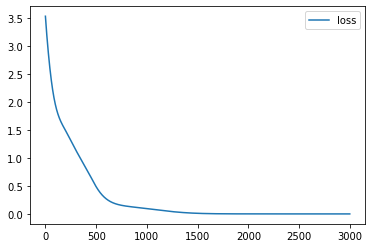

In [36]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.legend()

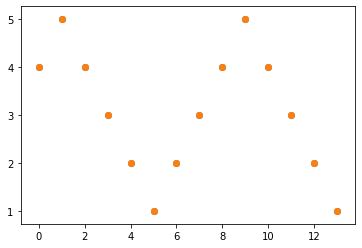

In [37]:
plt.scatter(np.arange(len(X)), model.predict(X), cmap = 'red')
plt.scatter(np.arange(len(X)), y)
plt.show()

In [38]:
model.get_weights()

[array([[ 1.1436975 , -0.28153673,  0.08349474, -0.15108494,  0.540876  ]],
       dtype=float32),
 array([[ 0.26839158, -0.3599567 ,  0.2847786 , -1.0849012 , -1.013969  ],
        [ 0.6835175 , -0.13543104, -1.2864332 ,  0.41156968,  0.1996419 ],
        [-1.0961239 ,  0.53099346,  0.08086976, -0.15872131,  1.5008694 ],
        [ 1.9361475 , -0.13285466, -0.18631394,  0.86493915, -1.4676229 ],
        [-0.23069309,  1.6409243 ,  0.00784774, -0.5275928 ,  1.3508005 ]],
       dtype=float32),
 array([-0.15627217, -0.0776444 , -0.08392862,  0.1930902 , -1.2623268 ],
       dtype=float32),
 array([[ 0.95849  ],
        [-1.2170466],
        [ 1.0683279],
        [-0.801456 ],
        [ 0.7883048]], dtype=float32),
 array([0.44072065], dtype=float32)]

In [39]:
model.layers[1].get_weights()

[array([[ 1.1436975 , -0.28153673,  0.08349474, -0.15108494,  0.540876  ]],
       dtype=float32),
 array([[ 0.26839158, -0.3599567 ,  0.2847786 , -1.0849012 , -1.013969  ],
        [ 0.6835175 , -0.13543104, -1.2864332 ,  0.41156968,  0.1996419 ],
        [-1.0961239 ,  0.53099346,  0.08086976, -0.15872131,  1.5008694 ],
        [ 1.9361475 , -0.13285466, -0.18631394,  0.86493915, -1.4676229 ],
        [-0.23069309,  1.6409243 ,  0.00784774, -0.5275928 ,  1.3508005 ]],
       dtype=float32),
 array([-0.15627217, -0.0776444 , -0.08392862,  0.1930902 , -1.2623268 ],
       dtype=float32)]

In [40]:
model.layers[2].get_weights()

[array([[ 0.95849  ],
        [-1.2170466],
        [ 1.0683279],
        [-0.801456 ],
        [ 0.7883048]], dtype=float32), array([0.44072065], dtype=float32)]

## Step 5: Predict 

In [41]:
Wx, Wh, bh = model.layers[1].get_weights()
print(Wx.shape, Wh.shape, bh.shape)
Wo, bo = model.layers[2].get_weights()
print(Wo.shape, bo.shape)

(1, 5) (5, 5) (5,)
(5, 1) (1,)


Let's select a sequence $[3,2,1]$.  We know next prediction would be 2

Make sure the input data is $N \times T \times D$

In [42]:
random_value = np.array([3,2,1])
random_value = random_value.reshape(1,-1,1)
print(random_value.shape)

(1, 3, 1)


In [43]:
random_value[0]

array([[3],
       [2],
       [1]])

In [44]:
print(model.predict(random_value))
print("This is a predicton by tensorflow")

[[1.9984878]]
This is a predicton by tensorflow


In [45]:
# This is for simple RNN.  

h_last = np.zeros(M)
yhats = []

for t in range(T):
    h = np.tanh(random_value[0][t].dot(Wx) + h_last.dot(Wh) + bh)
    y = h.dot(Wo) + bo # we only care about this value on the last iteration
    yhats.append(y)

    # important: assign h to h_last
    h_last = h

print(yhats)
print(yhats[-1][0])
print("This is a prediction by manually")

[array([2.93380072]), array([2.99229588]), array([1.99848813])]
1.9984881258108853
This is a prediction by manually


In [46]:
print(model.predict(random_value))
print("This is a predicton by tensorflow")

[[1.9984878]]
This is a predicton by tensorflow
